In [4]:
import numpy as np
from numpy.typing import NDArray
from typing import Tuple, Any
import cv2

In [2]:
def check_type(obj: Any, name: str):
    if isinstance(obj, int):
        return "int"
    elif not isinstance(obj, Tuple):
        raise ValueError(f"{name} should be tuple[int, int] or int, give {type(obj)}")
    if len(obj) == 1:
        return "int"
    if len(obj) == 0:
        raise ValueError(f"{name} should have len = 2, give {len(obj)}")

    if len(obj) > 2:
        raise RuntimeError(f"{name} should have len is 2, give {len(obj)}")
    
    if not isinstance(obj[0], int) or not isinstance(obj[1], int):
        raise ValueError(f"{name} should be tuple[int, int], give {type(obj[0]), type(obj[1])}")

In [43]:
class Conv2D:
    def __init__(
        self,
        channel_in: int, 
        channel_out: int, 
        kernel_size: int | Tuple[int, int],
        stride: int | Tuple[int, int],
        padding: int | Tuple[int, int]
    ) -> None:
        if not isinstance(channel_in, int): 
            raise ValueError(f"channel_in should be int, give {type(channel_in)}")
        if not isinstance(channel_out, int):
            raise ValueError(f"channel_out should be int, give {type(channel_out)}")
        if check_type(kernel_size, "kernel_size") == "int":
            kernel_size = (kernel_size, kernel_size)
        if check_type(stride, "stride") == "int":
            stride = (stride, stride)
        if check_type(padding, "padding") == "int":
            padding = (padding, padding)
        print(f"kernel_size = {kernel_size}, stride = {stride}, padding = {padding}")
        self._channel_in = channel_in
        self._channel_out = channel_out
        self._kernel_size = kernel_size
        self._stride = stride
        self._padding = padding
        np.random.seed(42)

    def __call__(self, img: NDArray[np.uint8]):
        # check that kernal_size is good 
        # create list of filters
        self._filters = []
        for _ in range(self._channel_out):
            self._filters.append(np.random.rand(self._channel_in, self._kernel_size[0], self._kernel_size[1]))
        return self.forward(img)
    
    def forward(self, img: NDArray[np.uint8]):
        n_filters = len(self._filters)
        n_channels = self._channel_in

        out_height = ((img.shape[0] + 2 * self._padding[0] - self._kernel_size[0]) // self._stride[0]) + 1
        out_width = ((img.shape[1] + 2 * self._padding[1] - self._kernel_size[1]) // self._stride[1]) + 1
        out_channels = n_filters
        out = np.zeros((out_channels, out_height, out_width))
        # add padding
        padd_height = img.shape[0] + 2 * self._padding[0]
        padd_weight = img.shape[1] + 2 * self._padding[1]
        padd_img = np.zeros((padd_height, padd_weight, img.shape[2]))
        padd_img[self._padding[0]:img.shape[0] + self._padding[0], self._padding[1]:img.shape[1] + self._padding[1]] = img
        for n in range(n_filters):
            for c in range(n_channels):
                for x in range(out_height):
                    for y in range(out_width):
                        for i in range(self._kernel_size[0]):
                            for j in range(self._kernel_size[1]):
                                out[n][x][y] += img[self._stride[0] * x + i][self._stride[1] * y + j][c] * n_filters[n][i][j][c]


        return out

In [44]:
conv = Conv2D(3, 8, kernel_size=3, stride=1, padding=1)

kernel_size = (3, 3), stride = (1, 1), padding = (1, 1)


In [45]:
img = cv2.imread("./data/chars1.png")

In [46]:
o = conv(img)

TypeError: 'int' object is not subscriptable

In [31]:
padd_height = img.shape[0] + 2 * 10
padd_weight = img.shape[1] + 2 * 10

In [32]:
img.shape

(545, 640, 3)

In [36]:
padd_img = np.zeros((padd_height, padd_weight, img.shape[2]))
padd_img[10:555, 10:650] = img

In [37]:
from PIL import Image

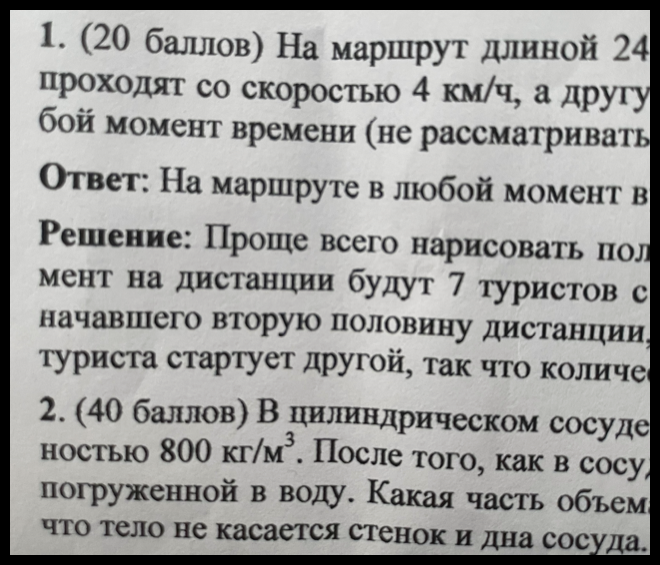

In [38]:
Image.fromarray(padd_img.astype(np.uint8))

In [26]:
padd_img

array([[[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [215., 217., 215.],
        [221., 223., 221.],
        ...,
        [207., 207., 205.],
        [206., 206., 204.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [217., 219., 217.],
        [217., 219., 217.],
        ...,
        [207., 207., 205.],
        [205., 205., 203.],
        [  0.,   0.,   0.]],

       ...,

       [[  0.,   0.,   0.],
        [174., 172., 167.],
        [172., 171., 166.],
        ...,
        [160., 160., 159.],
        [159., 160., 158.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [168., 167., 162.],
        [170., 169., 164.],
        ...,
        [160., 160., 160.],
        [159., 159., 159.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [22]:
padd_img.shape

(547, 642, 3)